# Exploratory Data Analysis

## Global

在Global里面导packages和define一些常用的variable

然后在各自的section里面尝试EDA

这样可以统一命名，希望不会有merge conflict

另外, [nbdime](https://nbdime.readthedocs.io/en/latest/index.html)看起来像是一个可以帮助解决merge conflict的东西，可以试一试

General [merge conflict solution](http://allendowney.github.io/amgit/conflict.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
!ls dataSets/training

links (table 3).csv                volume(table 6)_training.csv
routes (table 4).csv               weather (table 7)_training.csv
trajectories(table 5)_training.csv


In [3]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
routes = pd.read_csv(training_path1+'routes (table 4).csv')
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')

## Muci's Section

In [4]:
training_path1 = "dataSets/training/"
links = pd.read_csv(training_path1+'links (table 3).csv')
print(links.shape)
print(links.info())
links.head()

(24, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
link_id       24 non-null int64
length        24 non-null int64
width         24 non-null int64
lanes         24 non-null int64
in_top        21 non-null object
out_top       21 non-null object
lane_width    24 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.4+ KB
None


,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3


In [5]:
volume = pd.read_csv(training_path1+'volume(table 6)_training.csv')
print(volume.shape)
print(volume.info())
volume.head()

(543699, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543699 entries, 0 to 543698
Data columns (total 6 columns):
time             543699 non-null object
tollgate_id      543699 non-null int64
direction        543699 non-null int64
vehicle_model    543699 non-null int64
has_etc          543699 non-null int64
vehicle_type     212710 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 24.9+ MB
None


,time,tollgate_id,direction,vehicle_model,has_etc,vehicle_type
0,2016-09-19 23:09:25,2,0,1,0,NaN
1,2016-09-19 23:11:53,2,0,1,0,NaN
2,2016-09-19 23:13:54,2,0,1,0,NaN
3,2016-09-19 23:17:48,1,0,1,1,NaN
4,2016-09-19 23:16:07,2,0,1,0,NaN


In [6]:
routes = pd.read_csv(training_path1+'routes (table 4).csv')
print(routes.shape)
print(routes.info())
routes.head()

(6, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
intersection_id    6 non-null object
tollgate_id        6 non-null int64
link_seq           6 non-null object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


,intersection_id,tollgate_id,link_seq
0,A,2,"110,123,107,108,120,117"
1,A,3,"110,123,107,108,119,114,118,122"
2,B,1,"105,100,111,103,116,101,121,106,113"
3,B,3,"105,100,111,103,122"
4,C,1,"115,102,109,104,112,111,103,116,101,121,106,113"


In [7]:
weather = pd.read_csv(training_path1+'weather (table 7)_training.csv')
print(weather.shape)
print(weather.info())
weather.head()

(782, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
date              782 non-null object
hour              782 non-null int64
pressure          782 non-null float64
sea_pressure      782 non-null float64
wind_direction    782 non-null float64
wind_speed        782 non-null float64
temperature       782 non-null float64
rel_humidity      782 non-null float64
precipitation     782 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 55.1+ KB
None


,date,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation
0,2016-07-01,0,1000.4,1005.3,225.0,2.1,26.4,94.0,0.0
1,2016-07-01,3,1000.5,1005.3,187.0,2.7,29.0,76.0,0.0
2,2016-07-01,6,998.9,1003.7,212.0,2.9,31.7,67.0,0.0
3,2016-07-01,9,998.7,1003.5,244.0,2.7,31.6,59.0,0.0
4,2016-07-01,12,999.7,1004.5,222.0,1.3,29.9,68.0,0.0


In [8]:
trajectories = pd.read_csv(training_path1+'trajectories(table 5)_training.csv')
print(trajectories.shape)
print(trajectories.info())
trajectories.head()

(109244, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109244 entries, 0 to 109243
Data columns (total 6 columns):
intersection_id    109244 non-null object
tollgate_id        109244 non-null int64
vehicle_id         109244 non-null int64
starting_time      109244 non-null object
travel_seq         109244 non-null object
travel_time        109244 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.0+ MB
None


,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


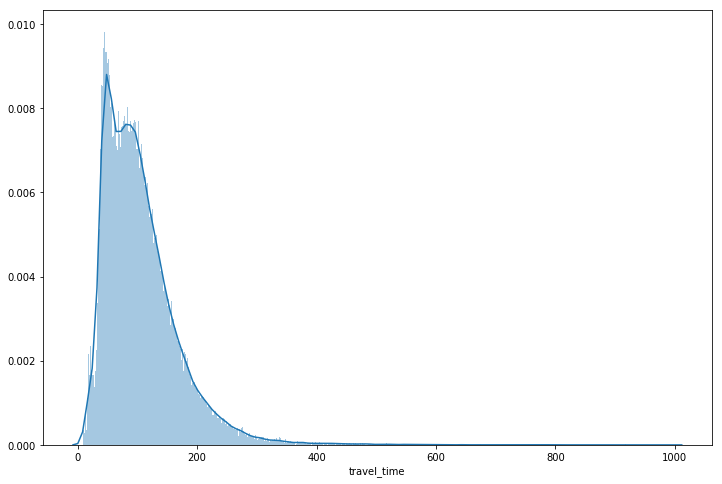

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.distplot(trajectories["travel_time"][trajectories.travel_time < 1000], bins = 1000)

In [10]:
trajectories.isnull().sum()

intersection_id    0
tollgate_id        0
vehicle_id         0
starting_time      0
travel_seq         0
travel_time        0
dtype: int64

In [11]:
trajectories.shape

(109244, 6)

In [12]:
type(trajectories["starting_time"][2])

str

In [13]:
travel_seq = trajectories.travel_seq

In [14]:
len(travel_seq)

109244

In [15]:
type(range(109244))

range

- start time: 2016-07-19 00:14:24
- end time: 2016-10-17 23:56:52
- 131,022 minutes (rounded down)
- 26205 time slot

In [16]:
def get_info(seq):
    new_seq = [[x.split('#')[0], x.split('#')[1], x.split('#')[2]] for x in seq]
    return new_seq

info = []
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i]. split(';')
    info_item = get_info(seq)
    info.append(info_item)

In [17]:
def get_info_tup(x):
    link_id, start_time, duration = x.split('#')[0], x.split('#')[1], x.split('#')[2]
    return link_id, start_time, duration 

In [18]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in 
       datetime_range(datetime(2016, 7, 19, 0, 14, 24), datetime(2016, 10, 17, 23, 56, 52), 
       timedelta(minutes=5))]

In [19]:
header = links.link_id
index = dts
LT_df = pd.DataFrame(columns = header, index = index)
LT_df = LT_df.fillna(0)
LT_df.index.name = 'time_slot'

In [58]:
trajectories.loc[3]['intersection_id']

'A'

In [61]:
trajectories['starting_time'] = pd.to_datetime(trajectories.starting_time)

In [62]:
trajectories.head()

,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98


In [69]:
import time
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

time_interval_minutes = 5
dts = [dt for dt in 
       datetime_range(datetime(2016, 7, 19, 0, 10, 0), datetime(2016, 10, 18, 0, 0, 0), 
       timedelta(minutes=time_interval_minutes))]

start_time_sys = time.clock()

start = dts[0]
LT_matrix = [[0]*len(LT_df.columns) for _ in range(len(dts))]

same_route_cars_dict = {}
key_list = []
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i].split(';')
    
    #build a dict to record how many cars are starting from the same loc at each time slot
    start_loc = trajectories.loc[i]['intersection_id']
    start_time = trajectories.loc[i]['starting_time']
    start_time_slot = int((start_time - start).total_seconds()/60/time_interval_minutes)
    key = (start_time_slot, start_loc)
    key_list.append(key)
    if key not in same_route_cars_dict:   
        same_route_cars_dict[(start_time_slot, start_loc)] = 1
    else:
        same_route_cars_dict[(start_time_slot, start_loc)] += 1
        
#     for item in seq:
#         link_id, starting_time, duration = get_info_tup(item)
#         cur_time = datetime.strptime(starting_time, '%Y-%m-%d %H:%M:%S')
#         td = (cur_time - start).total_seconds()/60/time_interval_minutes
#         t_idx = int(td)
#         l_idx = int(link_id) - 100
#         LT_matrix[t_idx][l_idx] += 1

# LT_df = pd.DataFrame(LT_matrix, columns = LT_df.columns, index = dts)

print("Code Run Time: ", time.clock() - start_time_sys, "seconds")
LT_df.head(20)

Code Run Time:  38.075985 seconds


link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
2016-07-19 00:10:00,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2016-07-19 00:20:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:25:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:35:00,2,1,0,2,0,2,1,1,1,0,1,2,0,1,0,0,1,1,0,0,1,1,1,1
2016-07-19 00:40:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:45:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-19 00:55:00,1,1,1,2,1,1,1,0,0,1,0,2,1,1,0,1,1,0,0,0,0,1,1,0


In [67]:
same_route_cars_dict

{(0, 'B'): 1,
 (5, 'B'): 2,
 (5, 'A'): 1,
 (9, 'B'): 1,
 (9, 'C'): 1,
 (15, 'B'): 1,
 (17, 'A'): 3,
 (17, 'C'): 1,
 (18, 'B'): 1,
 (18, 'A'): 1,
 (18, 'C'): 1,
 (19, 'C'): 1,
 (19, 'A'): 1,
 (19, 'B'): 1,
 (20, 'A'): 1,
 (24, 'B'): 1,
 (26, 'A'): 1,
 (29, 'A'): 2,
 (30, 'B'): 2,
 (30, 'A'): 2,
 (33, 'A'): 1,
 (36, 'A'): 1,
 (39, 'A'): 1,
 (41, 'A'): 1,
 (42, 'A'): 2,
 (42, 'B'): 3,
 (44, 'B'): 1,
 (45, 'A'): 1,
 (47, 'B'): 2,
 (47, 'A'): 2,
 (48, 'A'): 1,
 (50, 'B'): 1,
 (51, 'A'): 2,
 (51, 'B'): 1,
 (52, 'A'): 2,
 (53, 'A'): 2,
 (54, 'B'): 1,
 (54, 'C'): 1,
 (54, 'A'): 2,
 (55, 'A'): 1,
 (56, 'A'): 2,
 (57, 'B'): 1,
 (58, 'B'): 1,
 (59, 'A'): 3,
 (60, 'A'): 1,
 (61, 'A'): 1,
 (62, 'A'): 1,
 (63, 'B'): 1,
 (63, 'A'): 1,
 (64, 'A'): 2,
 (65, 'A'): 4,
 (66, 'A'): 3,
 (68, 'A'): 1,
 (69, 'B'): 1,
 (69, 'A'): 3,
 (71, 'A'): 1,
 (72, 'C'): 1,
 (72, 'A'): 2,
 (72, 'B'): 2,
 (73, 'A'): 4,
 (75, 'A'): 3,
 (75, 'C'): 1,
 (76, 'A'): 3,
 (77, 'A'): 4,
 (77, 'B'): 1,
 (79, 'A'): 6,
 (80, 'B'): 1,


In [21]:
V_matrix = [[0]*len(LT_df.columns) for _ in range(len(trajectories.vehicle_id))]
for i in range(len(trajectories.travel_seq)):
    seq = trajectories.travel_seq[i].split(';')
    for item in seq:
        link_id, starting_time, duration = get_info_tup(item)
        l_idx = int(link_id) - 100
        V_matrix[i][l_idx] += 1

V_df = pd.DataFrame(V_matrix, columns = LT_df.columns, index = trajectories.vehicle_id)

In [22]:
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0


In [23]:
tra = copy.deepcopy(trajectories)

In [24]:
tra = tra.set_index(['vehicle_id'])

In [25]:
V_df['start_time'] = tra['starting_time']

row: vehicle_id


columns: links(dummy), entry time, avg width, avg length of the link, 同行车

In [41]:
links.head()

,link_id,length,width,lanes,in_top,out_top,lane_width
0,100,58,3,1,105,111,3
1,101,84,3,1,116,121,3
2,102,131,9,3,115,109,3
3,103,23,12,4,111,"122,116",3
4,104,293,9,3,109,112,3


In [43]:
links_inds = links.set_index('link_id')

In [44]:
def avg_len_wid(x):
    inds = x[x == 1].index
    
    avg_len = 0
    avg_wid = 0
    
    for item in inds:
        #return(links_inds.loc[item])
        avg_len += links_inds.loc[item]['length']
        avg_wid += links_inds.loc[item]['width']
        
    return([avg_len/len(inds), avg_wid/len(inds)])

In [39]:
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,start_time
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:14:24
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:35:56
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:37:15
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2016-07-19 00:37:59
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:56:21


In [45]:
a = V_df.apply(avg_len_wid, axis = 1)

In [46]:
avg_lens = []
avg_wids = []

for item in a:
    avg_lens.append(item[0])
    avg_wids.append(item[1])

In [47]:
V_df['avg_wid'] = avg_wids
V_df['avg_len'] = avg_lens

In [82]:
V_df['loc_time'] = key_list
V_df['same_route_cars'] = V_df.loc_time.apply(lambda x: same_route_cars_dict[x])
V_df['travel_time'] = trajectories.set_index('vehicle_id').travel_time
V_df_ = V_df.drop(columns = ['start_time', 'loc_time'], axis = 1)
V_df_.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,avg_wid,avg_len,same_route_cars,travel_time
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,7.200000,95.400000,1,70.85
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,7.200000,95.400000,2,148.79
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,6.333333,91.222222,2,79.76
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,7.000000,64.000000,1,58.05
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,6.333333,91.222222,1,137.98


In [85]:
traintest_split = int(V_df_.shape[0]*0.66)
V_train = V_df_.iloc[:traintest_split, :] 
V_test = V_df_.iloc[traintest_split:, :] 

X_train = V_train.iloc[:,:-1]
y_train = V_train.iloc[:,-1]

X_test = V_test.iloc[:,:-1]
y_test = V_test.iloc[:,-1]

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# your code here
OS = []
MSE = []
MAE = []
for i in range(1,11):
    param_grid = {'max_depth':range(1,11)}
    rf = RandomForestRegressor(n_estimators = 12,max_depth=i)
    # gs=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rf.fit(X_train,y_train)
    OS.append(rf.score(X_test, y_test))
    y_pred = rf.predict(X_test)
    mse_ = mean_squared_error(y_test, y_pred)
    mae_ = mean_absolute_error(y_test, y_pred)
    
    MSE.append(mse_)
    MAE.append(mae_)

print("OS R-Square: ", np.mean(OS))
print("MSE: ", np.mean(MSE))
print("MAE: ", np.mean(MAE))

OS R-Square:  0.29630212694713043
MSE:  3168.9564017985876
MAE:  35.84225817076017


In [100]:
MSE

[3500.306873928374,
 3071.4693469905856,
 3093.1498425642985,
 3101.4851739682726,
 3121.5064325279236,
 3128.2430142076787,
 3149.66120876065,
 3155.882828180919,
 3180.7354663472565,
 3187.123830509919]

In [101]:
V_df

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,start_time,avg_wid,avg_len,loc_time,same_route_cars,travel_time
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:14:24,7.200000,95.400000,"(0, B)",1,70.85
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:35:56,7.200000,95.400000,"(5, B)",2,148.79
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:37:15,6.333333,91.222222,"(5, B)",2,79.76
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2016-07-19 00:37:59,7.000000,64.000000,"(5, A)",1,58.05
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:56:21,6.333333,91.222222,"(9, B)",1,137.98
1072812,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,2016-07-19 00:56:31,9.000000,150.750000,"(9, C)",1,113.54
1014648,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 01:26:03,6.333333,91.222222,"(15, B)",1,176.70
1063919,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2016-07-19 01:36:04,7.000000,64.000000,"(17, A)",3,74.47
1064408,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,2016-07-19 01:36:20,6.750000,106.500000,"(17, A)",3,94.57


In [131]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

#dropped 8 outliers that clearly have wrong wind direction data
weather = weather[weather.wind_direction <= 360]
weather_ = weather.loc[:,'pressure':'precipitation']
columns = weather_.columns
weather_ = preprocessing.normalize(weather_)
weather_ = pd.DataFrame(weather_, columns = columns)
weather_.head()

,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation
0,0.695059,0.698463,0.156326,0.001459,0.018342,0.065309,0.0
1,0.698231,0.701581,0.130504,0.001884,0.020239,0.053039,0.0
2,0.696701,0.700049,0.147863,0.002023,0.022110,0.046730,0.0
3,0.694407,0.697744,0.169656,0.001877,0.021972,0.041023,0.0
4,0.695980,0.699321,0.154554,0.000905,0.020816,0.047341,0.0


In [132]:
def report(n, cluster):
    print("{} clusters were formed.".format(n))
    for c in range(n):
        n_ele = sum([1 for x in cluster if x == c])
        print("Cluster {} has {} elements".format(c, n_ele))

In [133]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,11)
silhouette_avg = {}
results = {}

print("For clustering method KMeans:")
for n in range_n_clusters:
    km = KMeans(n_clusters=n, random_state=123)
    km.fit(weather_)
    res = km.predict(weather_)
    results[n] = res
    silhouette_avg[n] = silhouette_score(weather_, res)

best_n = max(silhouette_avg.keys(), key=(lambda key: silhouette_avg[key]))
cluster = results[best_n]
report(best_n, cluster)

For clustering method KMeans:
3 clusters were formed.
Cluster 0 has 229 elements
Cluster 1 has 327 elements
Cluster 2 has 218 elements


In [134]:
weather['label'] = cluster
weather[weather.label == 0].describe()

,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,label
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0
mean,9.641921,1001.593886,1006.423581,204.698690,1.949345,29.659389,72.139738,0.051092,0.0
std,7.493458,3.972422,4.022695,27.602775,0.924359,4.439294,16.575125,0.315479,0.0
min,0.000000,993.400000,998.200000,135.000000,0.300000,18.400000,31.000000,0.000000,0.0
25%,3.000000,999.600000,1004.400000,187.000000,1.400000,26.400000,60.000000,0.000000,0.0
50%,9.000000,1001.100000,1005.900000,208.000000,1.800000,29.700000,72.000000,0.000000,0.0
75%,18.000000,1002.900000,1007.700000,222.000000,2.400000,32.200000,87.000000,0.000000,0.0
max,21.000000,1015.500000,1020.500000,264.000000,5.400000,39.400000,98.000000,3.600000,0.0


In [135]:
weather[weather.label == 1].describe()

,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,label
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.0
mean,10.045872,1004.484709,1009.365138,65.666667,2.692966,27.762080,72.467890,0.217431,1.0
std,6.163994,6.086202,6.176371,33.548000,1.295833,4.762227,14.060061,1.142931,0.0
min,0.000000,994.100000,998.900000,0.000000,0.400000,15.400000,29.000000,0.000000,1.0
25%,6.000000,1000.000000,1004.800000,40.500000,1.700000,24.150000,62.000000,0.000000,1.0
50%,9.000000,1002.500000,1007.300000,70.000000,2.400000,28.000000,74.000000,0.000000,1.0
75%,15.000000,1008.250000,1013.250000,93.000000,3.400000,31.200000,82.500000,0.000000,1.0
max,21.000000,1018.400000,1023.500000,133.000000,7.500000,38.300000,98.000000,14.200000,1.0


In [136]:
weather[weather.label == 2].describe()

,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,label
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,11.986239,1005.960092,1010.874771,326.761468,2.216055,25.018807,78.568807,0.432110,2.0
std,6.933176,5.551843,5.643222,23.184851,1.213241,4.755415,16.236085,2.326679,0.0
min,0.000000,995.900000,1000.600000,266.000000,0.500000,14.100000,27.000000,0.000000,2.0
25%,6.000000,1001.525000,1006.300000,312.750000,1.500000,20.925000,69.000000,0.000000,2.0
50%,12.000000,1005.850000,1010.700000,331.000000,1.900000,24.450000,83.000000,0.000000,2.0
75%,18.000000,1009.800000,1014.800000,344.750000,2.600000,28.600000,92.000000,0.000000,2.0
max,21.000000,1017.400000,1022.500000,360.000000,7.300000,39.000000,98.000000,27.200000,2.0


In [182]:
weather['date'] = weather['date'].astype(str)
weather_ = weather[weather.date >= '2016-07-19']
weather_.head()

,date,hour,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,label
144,2016-07-19,0,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,0
145,2016-07-19,3,1000.5,1005.3,212.0,3.8,31.7,65.0,0.0,0
146,2016-07-19,6,999.7,1004.5,239.0,1.9,31.8,64.0,0.0,0
147,2016-07-19,9,998.7,1003.5,218.0,2.0,31.5,69.0,0.0,0
148,2016-07-19,12,1000.2,1005.0,215.0,0.7,30.0,77.0,0.0,0


In [209]:
key_array = zip(zip(weather.date, weather.hour), weather.label)
weather_dict = dict(key_array)

In [219]:
def getWeatherKey(timestamp):
    date, hour = timestamp.split(' ')[0], int(timestamp.split(' ')[1][:2])
    hour = (hour//3) * 3
    return (date, hour)

def applyWeatherDict(timestamp_serie, weather_dict):
    cluster_list = []
    for t in timestamp_serie:
        key = getWeatherKey(t)
#         print(key)
#         print(key in weather_dict)
        try:
            cluster = weather_dict[key]
        except KeyError:
            cluster = cluster_list[-1]
        cluster_list.append(cluster)
    return cluster_list

In [222]:
cluster_list = np.array(applyWeatherDict(V_df.start_time, weather_dict))
cluster_list

array([0, 0, 0, ..., 2, 2, 2])

In [226]:
V_df['weather'] = cluster_list
V_df.head()

link_id,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,start_time,avg_wid,avg_len,loc_time,same_route_cars,travel_time,weather
vehicle_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1065642,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:14:24,7.200000,95.400000,"(0, B)",1,70.85,0
1047198,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2016-07-19 00:35:56,7.200000,95.400000,"(5, B)",2,148.79,0
1086390,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:37:15,6.333333,91.222222,"(5, B)",2,79.76,0
1071181,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,2016-07-19 00:37:59,7.000000,64.000000,"(5, A)",1,58.05,0
1065807,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,2016-07-19 00:56:21,6.333333,91.222222,"(9, B)",1,137.98,0


In [225]:
V_df.shape

(109244, 30)